Escrever um textinho bacana de introdução aqui

## Etapa 1


--- Totais ---
Quantidade Total de Vértices: 11
Quantidade Total de Arestas: 3
Quantidade Total de Arcos: 11

--- Requeridos ---
Quantidade de Vértices Requeridos: 4
Quantidade de Arestas Requeridas: 3
Quantidade de Arcos Requeridos: 11

--- Outros ---
Densidade do Grafo: 0.12727272727272726
Componentes Conectados: 1
Grau (mínimo, máximo): (0, 4)
Intermediação: {'3': 0, '7': 0, '8': 0, '9': 12, '1': 12, '10': 16, '2': 16, '4': 0, '5': 0, '11': 0, '6': 0}
Caminho Médio: 28.23913043478261
Diâmetro: 66


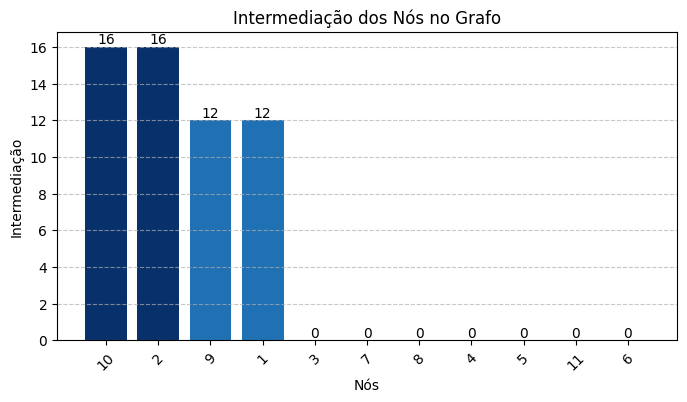

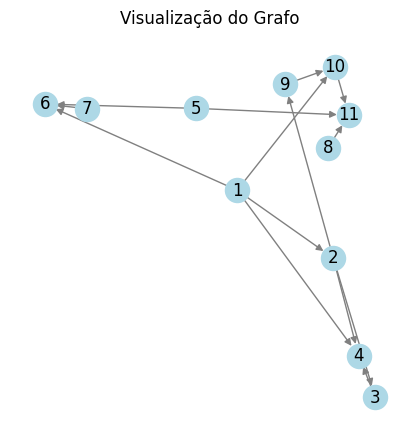

In [1]:
import sys
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
sys.path.append("../src")
sys.path.append("../data")

from leitura_dados import ler_arquivo
from estatisticas import *

grafo, capacidade_veiculo = ler_arquivo("../data/mggdb_0.25_4.dat")

print("\n--- Totais ---")
print(f"Quantidade Total de Vértices: {quantidade_vertices(grafo)}")
print(f"Quantidade Total de Arestas: {quantidade_arestas(grafo)}")
print(f"Quantidade Total de Arcos: {quantidade_arcos(grafo)}")

print("\n--- Requeridos ---")
print(f"Quantidade de Vértices Requeridos: {quantidade_vertices_requeridos(grafo)}")
print(f"Quantidade de Arestas Requeridas: {quantidade_arestas_requeridas(grafo)}")
print(f"Quantidade de Arcos Requeridos: {quantidade_arcos_requeridos(grafo)}")

print("\n--- Outros ---")
print("Densidade do Grafo:", densidade(grafo))
print("Componentes Conectados:", componentes_conectados(grafo))
print("Grau (mínimo, máximo):", grau_min_max(grafo))

caminhos, caminhos_completos = floyd_warshall(grafo)

print("Intermediação:", intermediacao(grafo, caminhos_completos)) 
print("Caminho Médio:", caminho_medio(caminhos))
print("Diâmetro:", diametro(caminhos))

# Dados da intermediação
intermediacao_dict = intermediacao(grafo, caminhos_completos)

# Ordenação dos nós pela intermediação (do maior para o menor)
nos_ordenados = sorted(intermediacao_dict.keys(), key=lambda x: intermediacao_dict[x], reverse=True)
valores_ordenados = [intermediacao_dict[no] for no in nos_ordenados]

# Criando o gráfico de barras
plt.figure(figsize=(8, 4))
valores_ordenados = np.array(valores_ordenados)  # Converte a lista em um array NumPy
norm = plt.Normalize(min(valores_ordenados), max(valores_ordenados))  # Normaliza os valores
colors = plt.cm.Blues(norm(valores_ordenados))  # Aplica coloração baseada na normalização

bars = plt.bar(nos_ordenados, valores_ordenados, color=colors)

# Adicionando os valores no topo das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontsize=10)

# Melhorias visuais
plt.xlabel("Nós")
plt.ylabel("Intermediação")
plt.title("Intermediação dos Nós no Grafo")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

G = nx.DiGraph()

for aresta in grafo.arestas:
    G.add_edge(aresta["de"], aresta["para"])

for arco in grafo.arcos:
    G.add_edge(arco["de"], arco["para"], color='red')  # Diferencie os arcos das arestas

plt.figure(figsize=(4, 4))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", arrows=True)
plt.title("Visualização do Grafo")
plt.show()


## Etapa 2

Escrever outro textinho bacana aqui

In [2]:
import os
import time

from leitura_dados import ler_arquivo
from gerar_solucao import gerar_solucao  # Função que precisa ser implementada

# Definir pasta de entrada e saída
pasta_entrada = "../data/"
pasta_saida = "../solucoes/"

# Certificar-se de que a pasta de saída existe
os.makedirs(pasta_saida, exist_ok=True)

# Lista de arquivos .dat na pasta de entrada
arquivos = [f for f in os.listdir(pasta_entrada) if f.endswith(".dat")]

for arquivo in arquivos:    
    # Medir tempo de execução
    inicio_algoritmo = time.time()
    
    # Ler o grafo e a capacidade do veículo a partir do arquivo
    grafo, capacidade_veiculo = ler_arquivo(os.path.join(pasta_entrada, arquivo))
    
    print(f"\nProcessando {arquivo} | Capacidade do veículo: {capacidade_veiculo}")
    
    print("\nServiços Pendentes Antes da Distribuição:")
    for servico in grafo.requeridos["nos"] + grafo.requeridos["arestas"] + grafo.requeridos["arcos"]:
        print(servico)

    # Gerar solução para o problema com algoritmo construtivo
    solucoes, custo_total = gerar_solucao(grafo, capacidade_veiculo)  
    
    print("\nEstrutura Refinada das Rotas:")
    for i, veiculo in enumerate(solucoes):
        print(f"\nVeículo {i+1}: Demanda Total = {veiculo['demanda']} | Custo Total = {veiculo['custo']}")
        for servico in veiculo["rota"]:
            if isinstance(servico, dict):  # Garante que seja um dicionário antes de acessar índices
                print(f"Serviço {servico['id']}: {servico['inicio']} -> {servico['fim']} | Demanda = {servico['demanda']} | Custo = {servico['custo']}")

    fim_algoritmo = time.time()
    tempo_execucao = fim_algoritmo - inicio_algoritmo
    
    # Criar nome do arquivo de saída
    nome_saida = f"{pasta_saida}/sol-{arquivo}"  # Define um caminho limpo
    
    print("\nEstrutura Final das Rotas:")
    for i, veiculo in enumerate(solucoes):
        print(f"\nVeículo {i+1}:")
        for servico in veiculo["rota"]:
            print(servico)

    # Escrever a solução no arquivo
    with open(os.path.join(pasta_saida, nome_saida), "w") as f:
        f.write(f"{custo_total}\n")  # Custo total da solução
        f.write(f"{len(solucoes)}\n")  # Total de rotas
        f.write(f"{int(time.perf_counter())}\n")  # Clocks para execução do algoritmo
        f.write(f"{int(tempo_execucao)}\n")  # Clocks para encontrar a solução

        for i, veiculo in enumerate(solucoes, start=1):
            deposito = 0
            dia = 1

            # Calcular demanda e custo total da rota
            demanda_total = sum(servico.get("demanda", 0) for servico in veiculo["rota"] if isinstance(servico, dict) and servico["id"] != "D")
            custo_total_rota = sum(servico.get("custo", 0) for servico in veiculo["rota"] if isinstance(servico, dict) and servico["id"] != "D")

            # Contar total de visitas aos serviços e ao depósito
            total_visitas = sum(1 for servico in veiculo["rota"] if isinstance(servico, dict) and servico["id"] != "D") + 2  # Inclui ida e volta ao depósito

            # Criar linha de saída no formato correto
            linha_saida = f"{deposito} {dia} {i} {demanda_total} {custo_total_rota} {total_visitas}"

            for servico in veiculo["rota"]:
                if isinstance(servico, dict):
                    if servico["id"] == "D":
                        linha_saida += " (D 0,1,1)"
                    else:
                        linha_saida += f" (S {servico['id']},{servico['inicio']},{servico['fim']})"

            linha_saida += " (D 0,1,1)\n"  # Retorno final ao depósito
            f.write(linha_saida)
    
    print(f"Solução salva em: {os.path.join(nome_saida)}")



Processando DI-NEARP-n442-Q16k.dat | Capacidade do veículo: 16000

Serviços Pendentes Antes da Distribuição:
{'id': '1', 'inicio': '1', 'fim': '1', 'demanda': 37, 'custo': 37}
{'id': '2', 'inicio': '2', 'fim': '2', 'demanda': 1, 'custo': 1}
{'id': '3', 'inicio': '3', 'fim': '3', 'demanda': 24, 'custo': 24}
{'id': '4', 'inicio': '4', 'fim': '4', 'demanda': 24, 'custo': 24}
{'id': '5', 'inicio': '5', 'fim': '5', 'demanda': 1, 'custo': 1}
{'id': '6', 'inicio': '6', 'fim': '6', 'demanda': 1, 'custo': 1}
{'id': '7', 'inicio': '7', 'fim': '7', 'demanda': 44, 'custo': 44}
{'id': '8', 'inicio': '8', 'fim': '8', 'demanda': 24, 'custo': 24}
{'id': '9', 'inicio': '9', 'fim': '9', 'demanda': 1, 'custo': 1}
{'id': '10', 'inicio': '10', 'fim': '10', 'demanda': 29, 'custo': 29}
{'id': '11', 'inicio': '11', 'fim': '11', 'demanda': 1, 'custo': 1}
{'id': '12', 'inicio': '12', 'fim': '12', 'demanda': 17, 'custo': 17}
{'id': '13', 'inicio': '13', 'fim': '13', 'demanda': 17, 'custo': 17}
{'id': '14', 'ini